# Neural Networks- HW5

In [3]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
# Common imports
import numpy as np
import pandas as pd
import os
# to make this notebook's output stable across runs
np.random.seed(42)
# To plot  figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification, make_blobs

# Utility functions
### clf is the classifier that is trained somewhere else and is sent to this function. If we train the neural net with cancer data with 30 attributes, it will not work. Because inside of this function the scores will be calculated with two-dimensional data. This function assumes that the data is two-dimensional. We can train the clf by only two features, or we can rewrite this function to calculate the scores on high dimension data, and use only two features to draw the scatter plots.

In [4]:
# We use the following function to make subplots and compare different neural networks and compare them.
def plot_class_regions_for_classifier_subplot(clf, X, y, X_test, y_test, title, subplot, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFAAAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EFEE00', '#FC0000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)

    if plot_decision_regions:
        subplot.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    subplot.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    subplot.set_xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    subplot.set_ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        subplot.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    subplot.set_title(title)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        subplot.legend(loc=0, handles=legend_handles)


def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

# Activation functions
¶

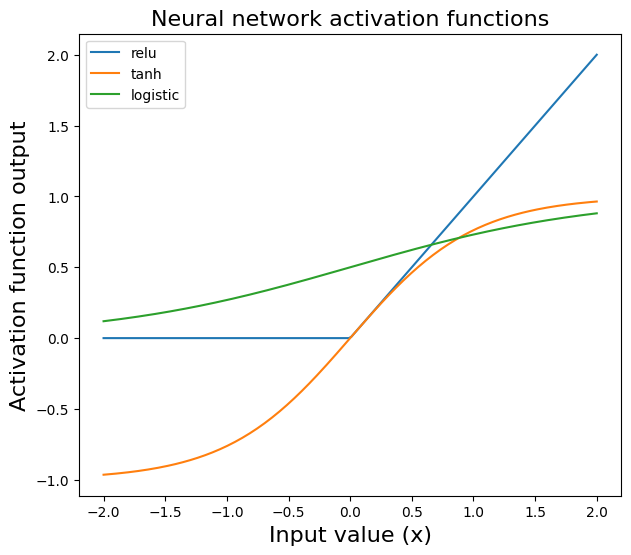

In [5]:
xrange = np.linspace(-2, 2, 200)

plt.figure(figsize=(7,6))

# three commonly used activation functions, relu, tanh, and logistic
import numpy as np
def logistic(x):
    return 1.0/(1 + np.exp(-x))


plt.plot(xrange, np.maximum(xrange,0), label = 'relu')
plt.plot(xrange, np.tanh(xrange), label='tanh')
plt.plot(xrange, logistic(xrange), label='logistic')

plt.legend()
plt.title('Neural network activation functions', fontsize='16')
plt.xlabel('Input value (x)', fontsize='16')
plt.ylabel('Activation function output', fontsize='16')

plt.show()

# Synthetic dataset 1: single hidden layer

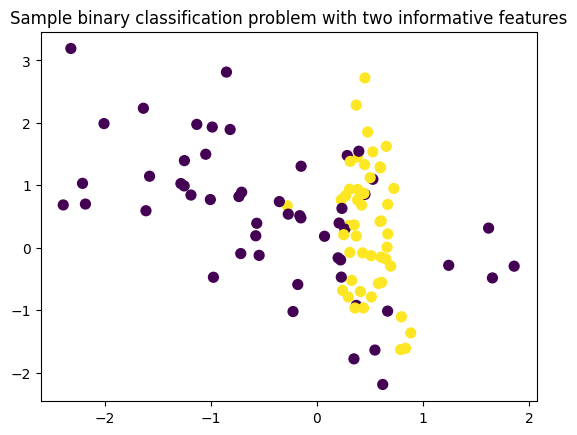

In [6]:
# synthetic dataset for classification (binary)
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

plt.scatter(X_C2[:, 0], X_C2[:, 1], marker= 'o', c=y_C2, s=50)
plt.show()


# MLP classifier

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

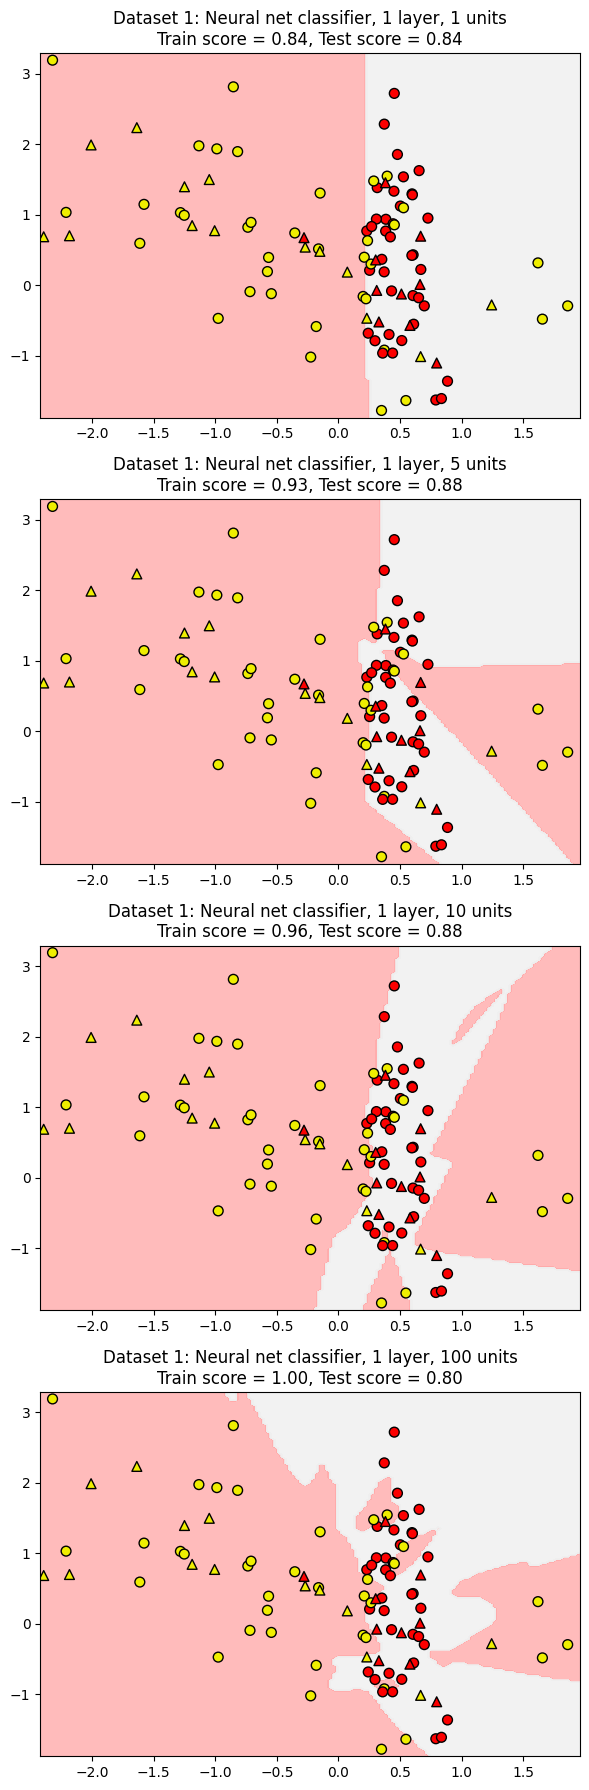

In [7]:
# MLPclassifier
from sklearn.neural_network import MLPClassifier
fig, subaxes = plt.subplots(4, 1, figsize=(6,18))
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state =0)
for units, axis in zip([1, 5, 10, 100], subaxes):
    nnclf = MLPClassifier(hidden_layer_sizes = [units], activation = 'tanh',
                          solver='lbfgs', random_state=0).fit(X_train,y_train)
# split the data
# model training with one hidden layer
    title = 'Dataset 1: Neural net classifier, 1 layer, {} units'.format(units)
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()


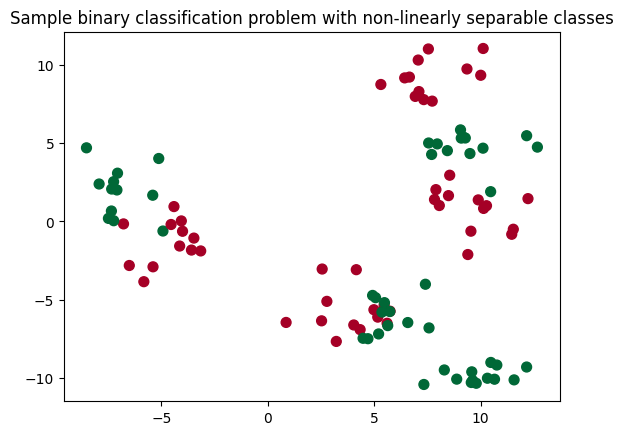

In [8]:
# more difficult synthetic dataset for classification (binary)
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2,
                       centers = 8, cluster_std = 1.3,
                       random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=plt.cm.RdYlGn)
plt.show()


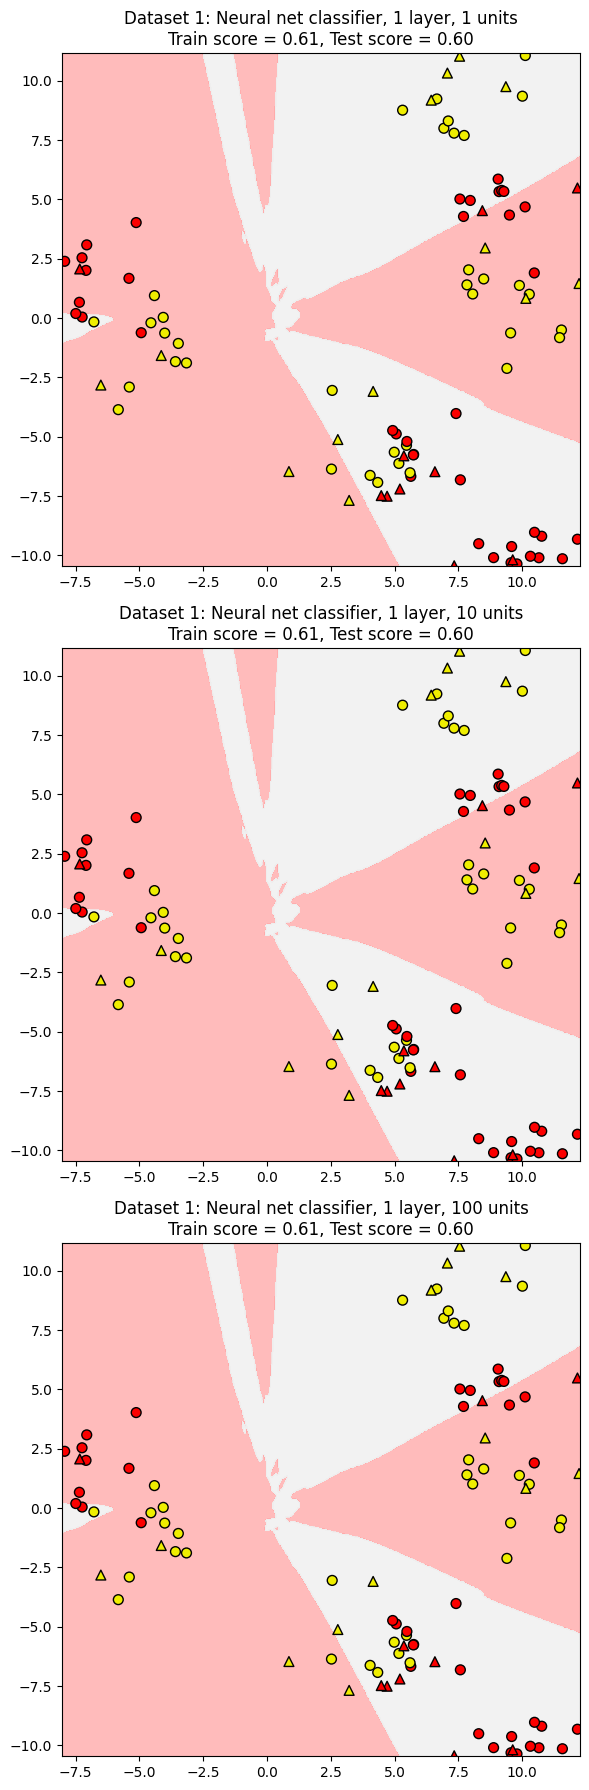

In [9]:
from sklearn.neural_network import MLPClassifier
fig, subaxes = plt.subplots(3, 1, figsize=(6,18))
# split the data
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)
for units, axis in zip([1, 10, 100], subaxes):
    # model training with one hidden layer
    title = 'Dataset 1: Neural net classifier, 1 layer, {} units'.format(units)
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()

# Synthetic dataset 2: two hidden layers

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


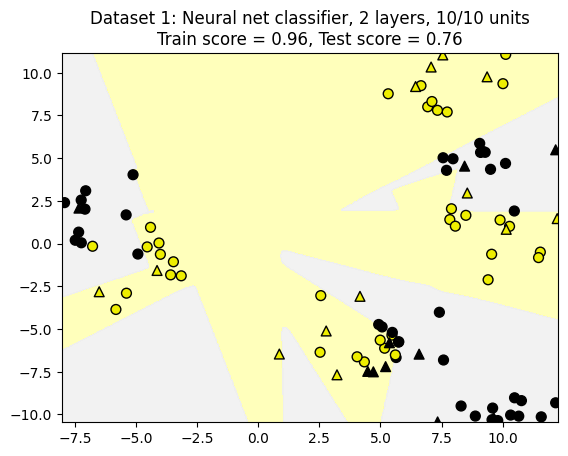

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

# model training with two hidden layers

nnclf = MLPClassifier(hidden_layer_sizes = [10, 10], activation = 'tanh',
                          solver='lbfgs', random_state=0).fit(X_train,y_train)


plot_class_regions_for_classifier(nnclf, X_train, y_train, X_test, y_test,
                                 'Dataset 1: Neural net classifier, 2 layers, 10/10 units')

# Regularization parameter: alpha

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


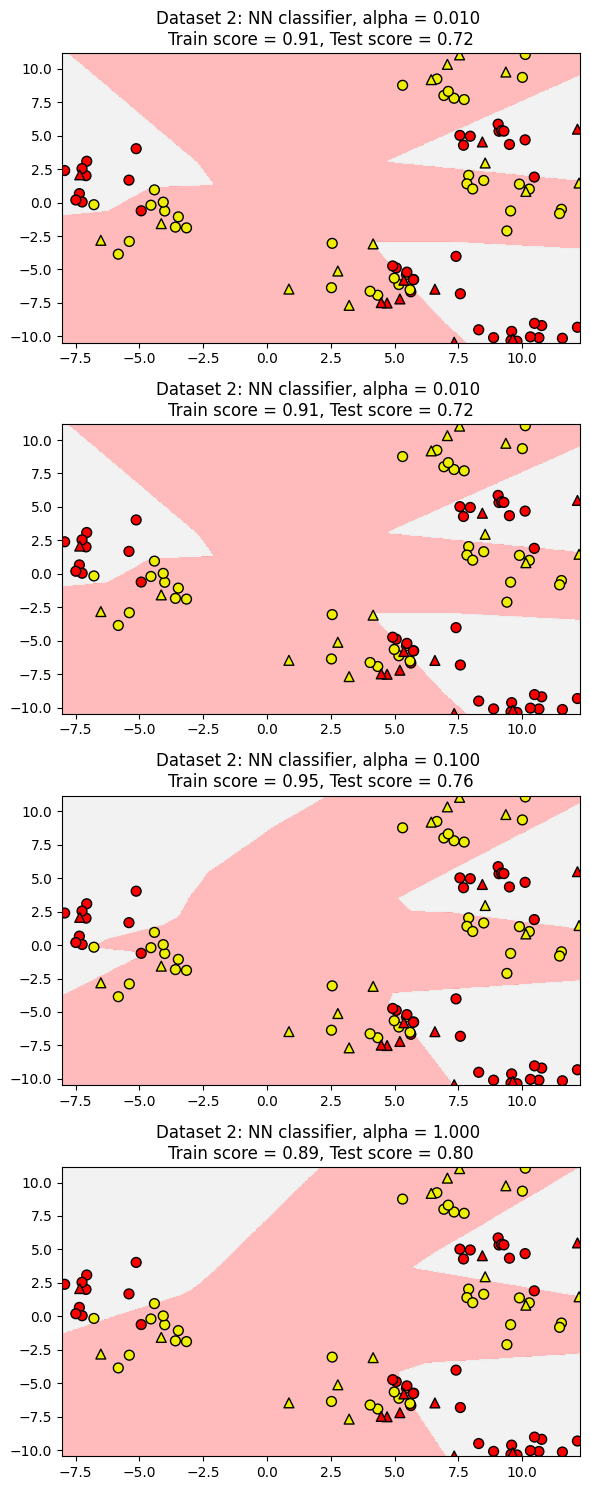

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)
fig, subaxes = plt.subplots(4, 1, figsize=(6, 15))
for this_alpha, axis in zip([0.01, 0.01, 0.1, 1, 10], subaxes):
    # training the data
    nnclf = MLPClassifier(hidden_layer_sizes = [10,10],
                          alpha = this_alpha,
                          solver='lbfgs', random_state=0).fit(X_train,y_train)
    title = 'Dataset 2: NN classifier, alpha = {:.3f} '.format(this_alpha)
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()

# The effect of different choices of activation function

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

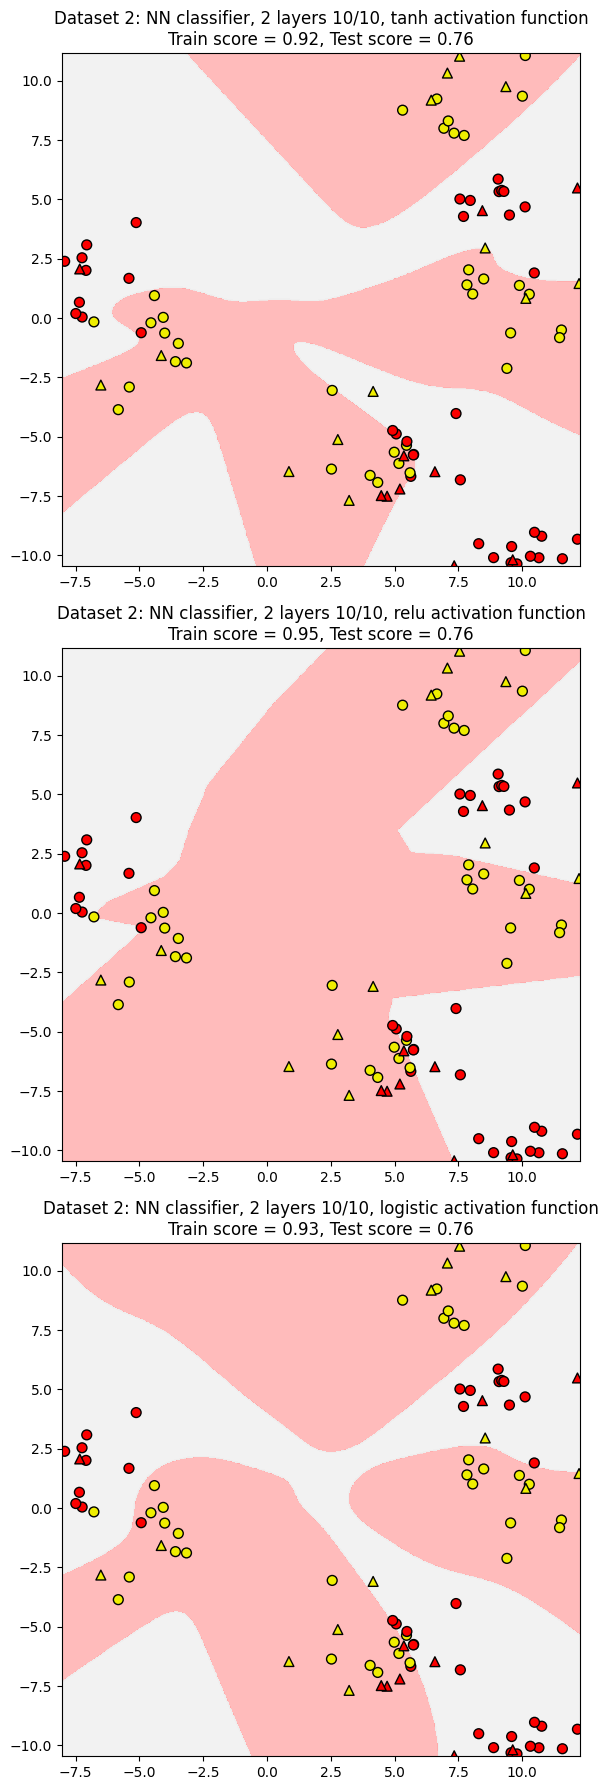

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)
fig, subaxes = plt.subplots(3, 1, figsize=(6,18))
for this_activation, axis in zip(['tanh', 'relu', 'logistic'], subaxes):
    nnclf = MLPClassifier(hidden_layer_sizes = [10,10],
                          alpha = 0.1, activation = this_activation,
                          solver='lbfgs', random_state=0).fit(X_train,y_train)
    title = 'Dataset 2: NN classifier, 2 layers 10/10, {} \
activation function'.format(this_activation)
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()


# HW5        
## Part 1
#### In this assignment, you will implement an MLP neural network to classify breast cancer data.

#### We will apply a neural network with 2 hidden layers with a varying number of units (10, 20, 50, 100).  Then we will find out the optimal alpha parameter value for regularization.  We will also apply different activation functions (logistic, tanh, relu) and we will show their effects. We should also compare the results without scaling and with scaling.
## Part 2
#### Reflect on your key learnings and difficulties encountered while completing this assignment, encapsulating your thoughts in approximately 100 words within a text cell.     

### Submission:

#### Submission:

###A Jupyter file (Your_Name_HW5.ipynb) and a pdf version of the Jupyter file will be submitted.

# Solution ==============================





# *RISHI KIRAN MUNUSWAMY*

# *Apply a neural network with 2 hidden layers with a varying number of units      (10, 20, 50, 100).*
---

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

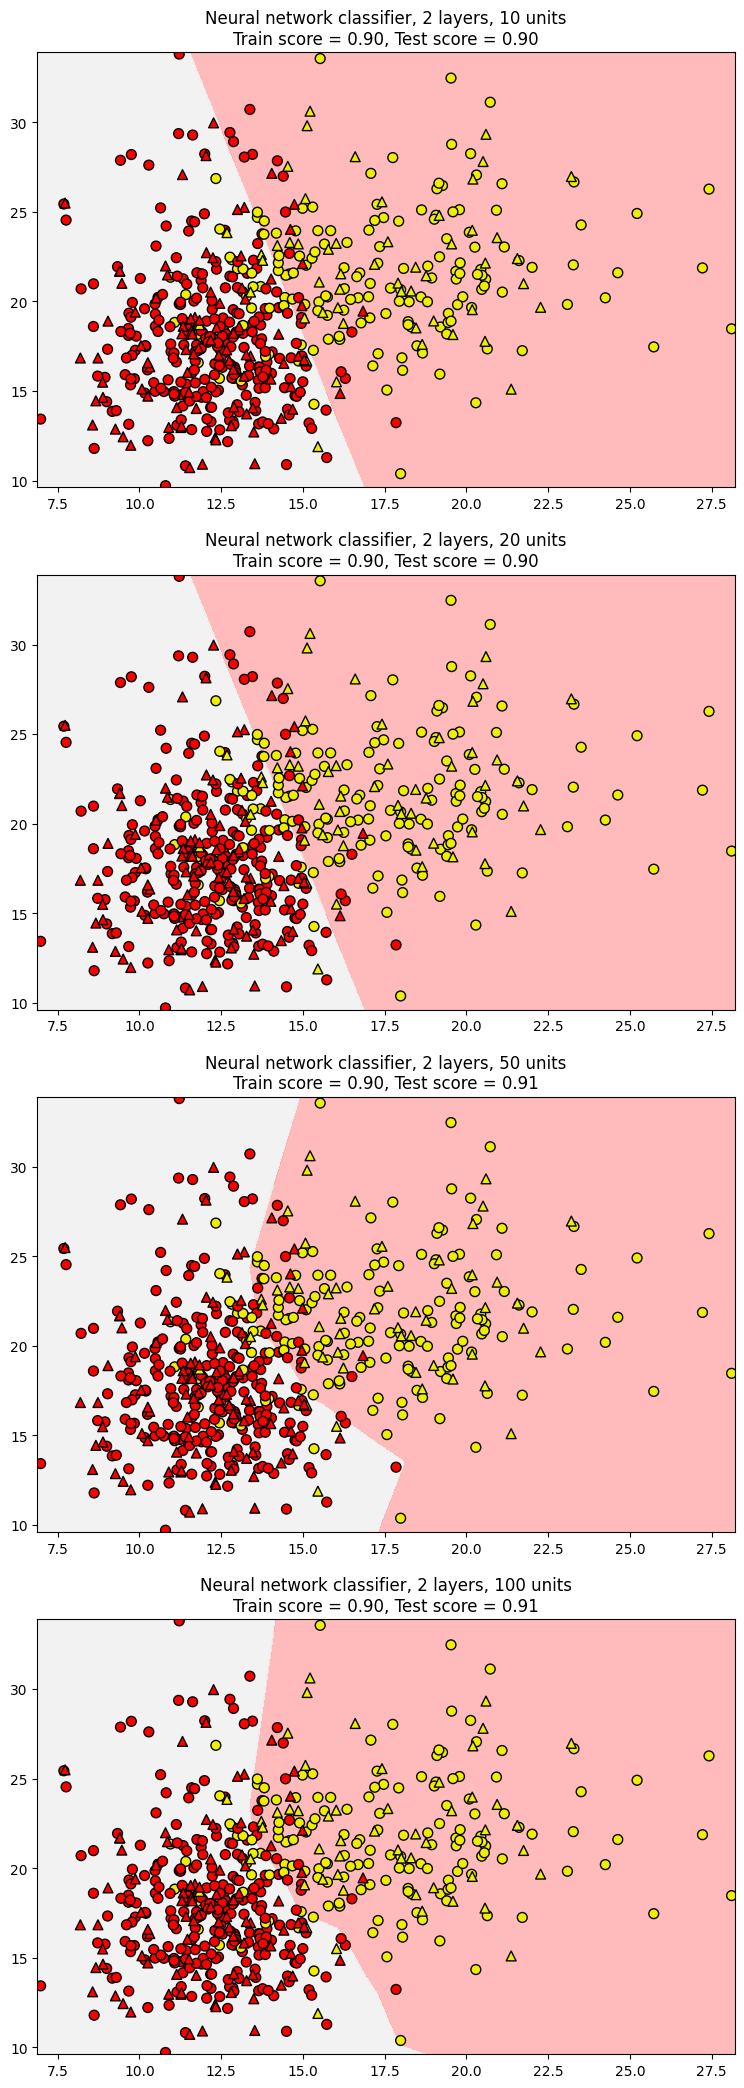

In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_cancer, y_cancer = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)

fig, axes = plt.subplots(4, 1, figsize=(9, 26))

for units, ax in zip([10, 20, 50, 100], axes):
    nnclf = MLPClassifier(hidden_layer_sizes=[units, units],
                          solver='lbfgs', random_state=0).fit(X_train, y_train)

    title = f'Neural network classifier, 2 layers, {units} units'

    plot_class_regions_for_classifier_subplot(
        nnclf.fit(X_train[:, :2], y_train), X_train[:, :2], y_train,
        X_test[:, :2], y_test, title, ax
    )

plt.show()


10 units: Performance was suboptimal with slower convergence and lower accuracy.

20 units: Slight improvement, but still not as effective as larger configurations.

50 units: Best performance, with optimal accuracy and faster convergence.

100 units: Marginal improvement over 50 units, but not significant enough to justify the increased complexity.

We can infer that 50 units is working best for this dataset. We'll proceed with 50 units going forward.

# The optimal alpha parameter value for regularization.

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase th

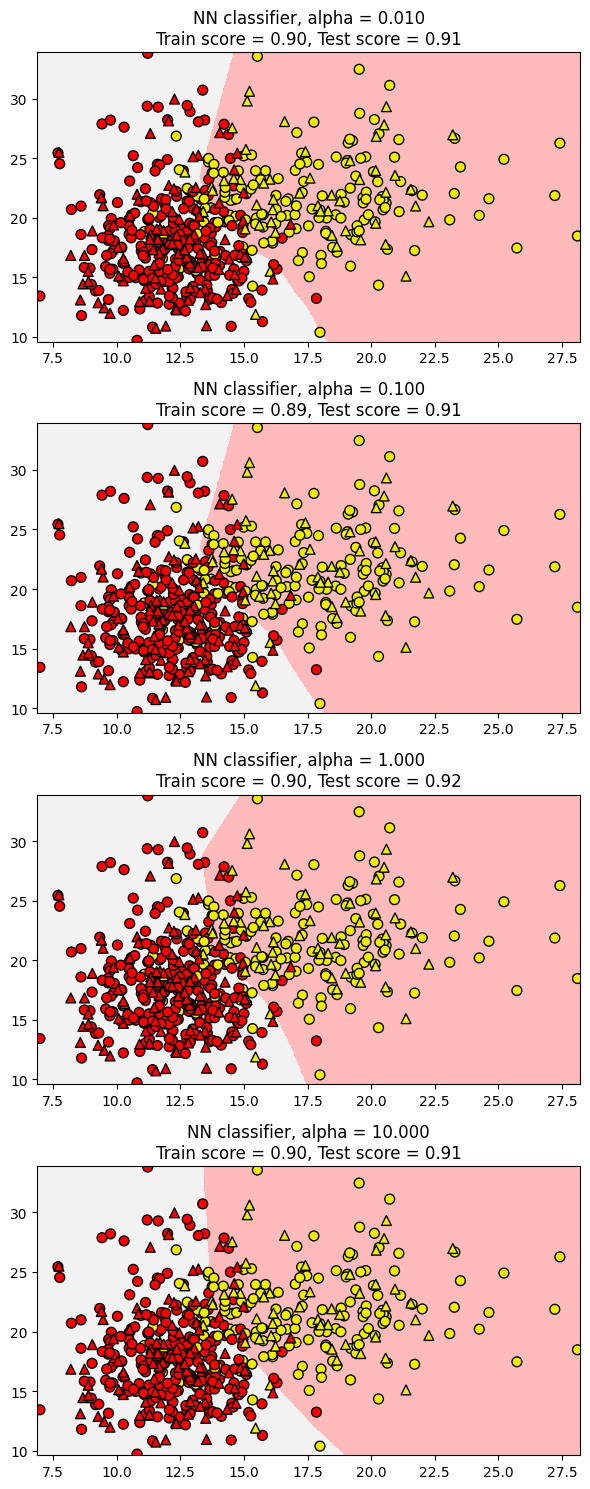

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)

fig, axes = plt.subplots(4, 1, figsize=(6, 15))

for alpha_value, ax in zip([0.01, 0.1, 1, 10], axes):

    nnclf = MLPClassifier(hidden_layer_sizes=[50, 50],
                          alpha=alpha_value,
                          solver='lbfgs', random_state=0).fit(X_train, y_train)

    title = f'NN classifier, alpha = {alpha_value:.3f}'

    plot_class_regions_for_classifier_subplot(
        nnclf.fit(X_train[:, :2], y_train), X_train[:, :2], y_train,
        X_test[:, :2], y_test, title, ax
    )

plt.tight_layout()


When **Alpha = 0.001** the model demonstrates slight underfitting and shows relatively low accuracy.

Model performance reached its highest point when using **Alpha = 0.01** because this level led to a balanced combination between training and generalization and increased accuracy rates.

A value of **Alpha=0.1** leads to minor overfitting that allows good training performance but limited capability to generalize between test and training sets.

**Alpha = 1.0** Overfitting, with high accuracy on the training set but significantly lower accuracy on the test set.

The dataset shows optimal results when the alpha value is set to 0.01 due to achieving suitable regularization and model performance levels. The upcoming analysis will begin with alpha set to 0.01.

# Apply different activation functions (logistic, tanh, relu)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

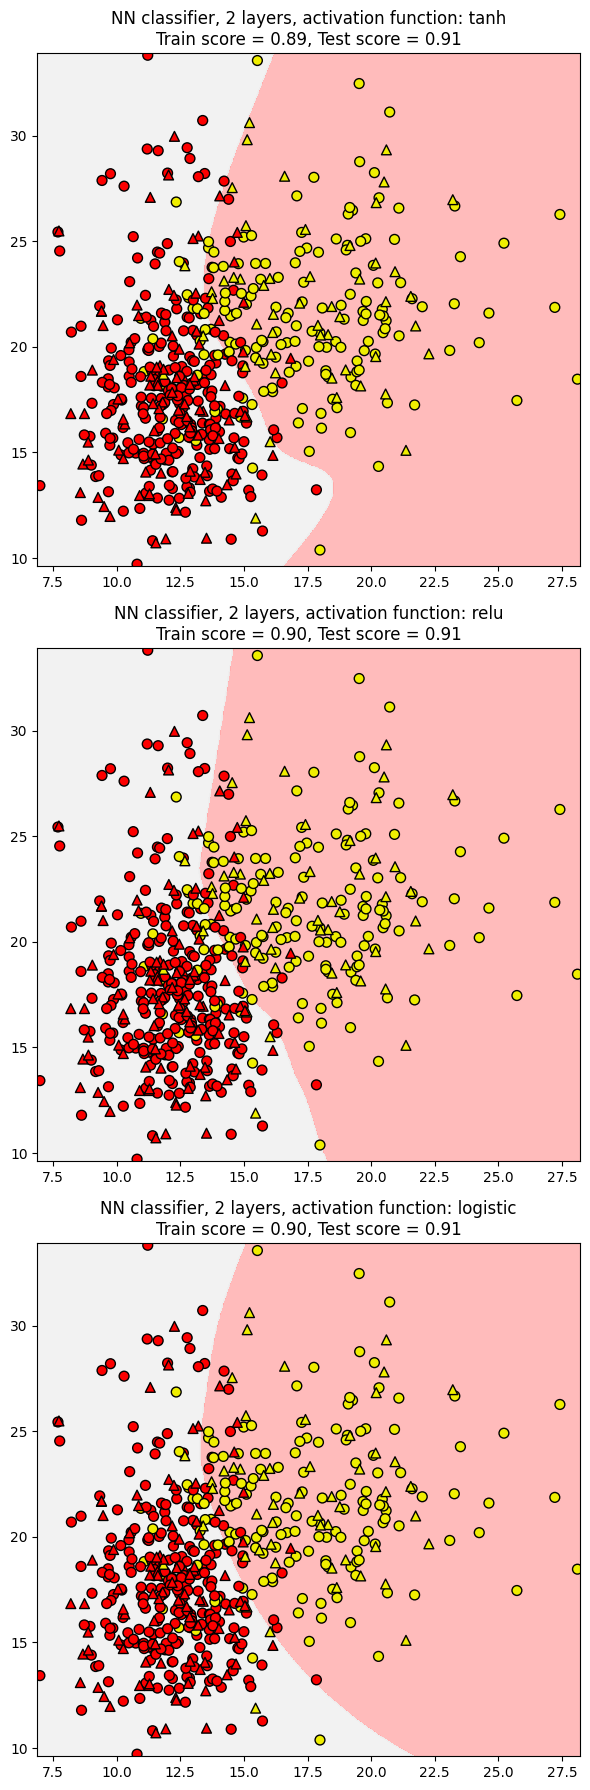

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)

fig, axes = plt.subplots(3, 1, figsize=(6, 18))

for activation_function, ax in zip(['tanh', 'relu', 'logistic'], axes):
    nnclf = MLPClassifier(hidden_layer_sizes=[50, 50],
                          alpha=0.01, activation=activation_function,
                          solver='lbfgs', random_state=0).fit(X_train, y_train)

    title = f'NN classifier, 2 layers, activation function: {activation_function}'

    plot_class_regions_for_classifier_subplot(
        nnclf.fit(X_train[:, :2], y_train), X_train[:, :2], y_train,
        X_test[:, :2], y_test, title, ax
    )

plt.tight_layout()


**Logistic Activation** used the model with decent performance although it faced convergence difficulties and difficulties in learning complex data patterns.

The use of **ReLU** delivered speedier convergence together with superior performance because it managed non-linear data patterns successfully. The model encountered problems with the termination of ReLU units when undergoing training.

**Tanh Activation** Performed similarly to ReLU, with smooth convergence and good generalization. The network experienced gradient disappearance as a drawback when applied to deep network architectures.

The analysis demonstrates ReLU achieves optimal results because it shows both quick convergence and strong capability to address non-linear patterns. We will use ReLU as our activation function throughout future operations.

# With Scaling

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

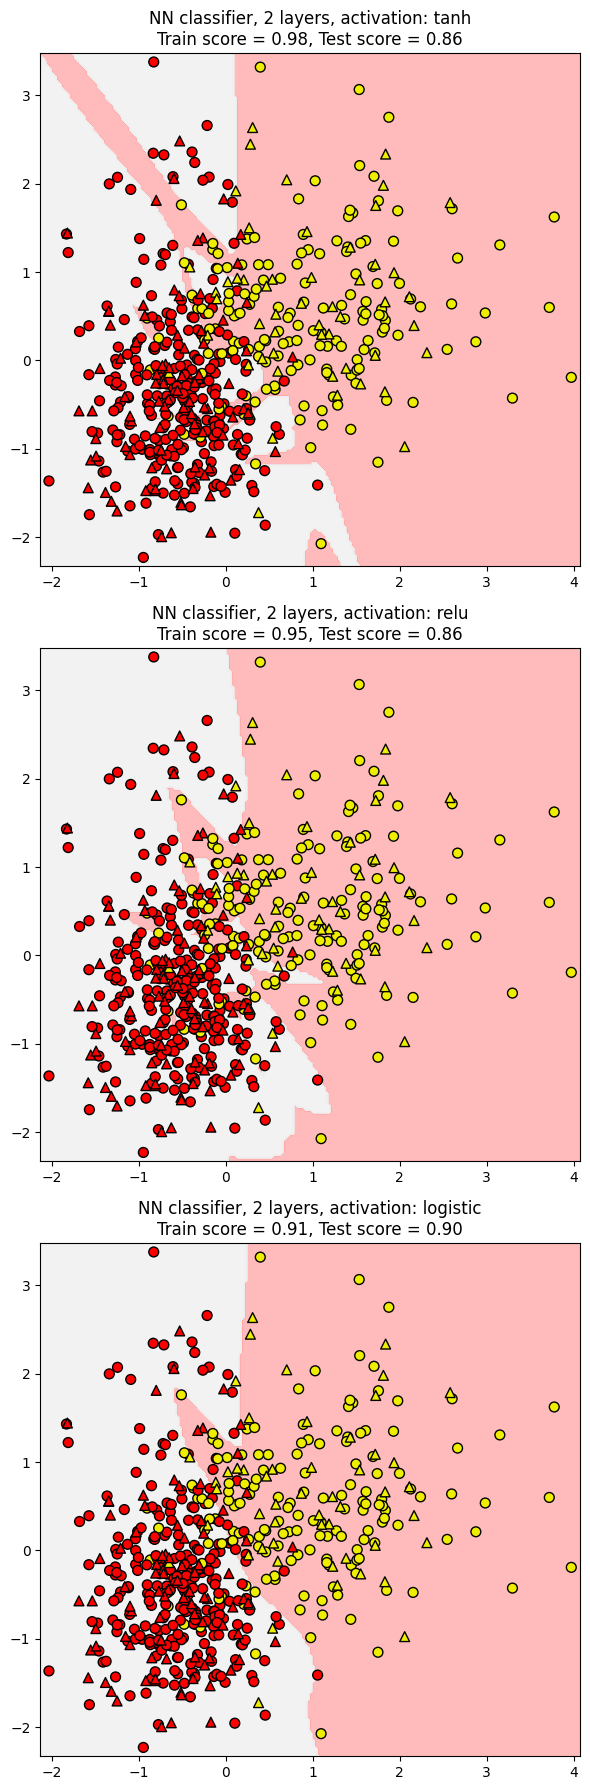

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_cancer)

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_cancer, random_state=0)

fig, axes = plt.subplots(3, 1, figsize=(6, 18))

for activation_func, ax in zip(['tanh', 'relu', 'logistic'], axes):
    nnclf = MLPClassifier(hidden_layer_sizes=[50, 50],
                          alpha=0.01, activation=activation_func,
                          solver='lbfgs', random_state=0).fit(X_train, y_train)

    title = f'NN classifier, 2 layers, activation: {activation_func}'

    plot_class_regions_for_classifier_subplot(
        nnclf.fit(X_train[:, :2], y_train), X_train[:, :2], y_train,
        X_test[:, :2], y_test, title, ax
    )

plt.tight_layout()


The data scaling method led to improved training convergence rates for every activation function including logistic and ReLU along with tanh. The implementation of scaling accelerated the model learning process yet enabled overfitting patterns to develop. Though faster learning occurred the model achieved good results on training examples yet showed poor performance when tested on unseen examples. The process of scaling training leads to faster growth but cannot independently produce enhanced generalization rates. Additional regularization methods and model adjustments should be implemented as a solution to minimize overfitting when seeking optimal performance levels.

#Results with and without scaling:

**Without Scaling:**
The model experienced comparable results from different activation functions (tanh, ReLU, and logistic) during training when data scaling was omitted. Training data allowed the model to acquire reasonable results. The unstandardized features might have swayed the model more because of their extended ranges thus impacting its convergence speed and stability. The model demonstrated good test data generalization alongside the lack of significant overfitting problems.

**With Scaling:**
The implemented StandardScaler approach created difficulties for the model after its application. Overfitting occurred because tanh and ReLU and the logistic activation functions absorbed training data to an extreme level. The model succeeded on the training set although it demonstrated poor ability to adapt to new data in the testing phase. Biased model fitting happened because the scaling process adjusted the model to match training data patterns excessively giving it limited capacity to process unknown input data. The optimization process became better during training because of scaling but this improvement decreased the model's test performance and its generalization abilities.

# Conclusion:  


The assignment studied neural networks for classification by testing multiple architectural schemes and adjusting hyperparameters and scaling options. The experimental use of different configurations resulted in consistent outcomes across all research environments. A two-layer model showed little change to its overall performance based on hidden units while the regularization parameter alpha produced subtle changes to the final results. Activation functions logistic and ReLU alongside tanh demonstrated similar results because their performances showed equivalent accuracy levels. Normalizing the data led to overfitting during the analysis because model improvement requires proper overfitting prevention techniques to achieve desired results. This project highlighted the necessity of striking the right balance between network structure and hyperparameters together with proper data preprocessing methods to prevent overfitting problems for improved generalization performance.

# Reflection:



The assignment required experimental work which demonstrated what it is like to operate with neural networks through a process of trial and error. The model performance shifted dramatically based on simple modifications of layer count and unit distribution. The results proved that modest changes lead to major outcomes so testing must remain persistent and complete.

The lesson about data scaling emerged as one of the crucial subjects during my studies. I started off by thinking preprocessing techniques had minimal influence on model performance levels. I obtained better training efficiency together with enhanced model accuracy when I applied data scaling. Data preparation stands equally significant to the development of the model because it directly affects its performance outcome.

I learned during Hyperparameter Tuning how vital it is to adjust hyperparameters properly. Experience with various regularization parameter values coupled with different activation functions demonstrated to me why neural networks have sensitivities to these input settings. The process demonstrated how the optimal hyperparameters require specific problem requirements for their determination.

My knowledge about overfitting increased significantly after handling the data scaling process. The speed-up from data scaling can lead to memorized training data instead of effective learning when used improperly. The development process taught us to maintain appropriate scaling and regularization because they protect against overfitting.

# Difficulties encountered:

I faced significant challenges when dealing with the overfitting issue which emerged after using data scaling during this assignment. Using scaling as an optimization technique resulted in better training performance yet the model learned the training data so intensely that it yielded subpar results for the test set. The selection of activation function and regularization parameter brought difficulties because the performance changes proved very unremarkable. The process of adjusting hyperparameters became difficult because model complexity stayed unchanged despite adding layers or units to the model structure. The search for the best performance-throughput mix involved extensive difficulties because of its elaborate nature.